In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gamma, lognorm

covid_cases_data=pd.read_csv("covid_confirmed_usafacts.csv")
covid_cases_df=pd.DataFrame(covid_cases_data)
newjersey_data=covid_cases_df[covid_cases_df['State']=='NJ']
print("Number of rows:", newjersey_data.shape[0])
print("Number of columns:", newjersey_data.shape[1])

newjersey_data.head(22)
#print(newjersey_data.columns)

Number of rows: 22
Number of columns: 1269


,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
1804,0,Statewide Unallocated,NJ,34,0,0,0,0,0,0,...,1608,1608,1608,1608,1608,1608,1608,1608,1608,1608
1805,34001,Atlantic County,NJ,34,0,0,0,0,0,0,...,89852,89852,89852,89852,89852,89852,89852,89852,89852,89852
1806,34003,Bergen County,NJ,34,0,0,0,0,0,0,...,320734,320734,320734,320734,320734,320734,320734,320734,320734,320734
1807,34005,Burlington County,NJ,34,0,0,0,0,0,0,...,138798,138798,138798,138798,138798,138798,138798,138798,138798,138798
1808,34007,Camden County,NJ,34,0,0,0,0,0,0,...,166044,166044,166044,166044,166044,166044,166044,166044,166044,166044
1809,34009,Cape May County,NJ,34,0,0,0,0,0,0,...,29823,29823,29823,29823,29823,29823,29823,29823,29823,29823
1810,34011,Cumberland County,NJ,34,0,0,0,0,0,0,...,51414,51414,51414,51414,51414,51414,51414,51414,51414,51414
1811,34013,Essex County,NJ,34,0,0,0,0,0,0,...,287354,287354,287354,287354,287354,287354,287354,287354,287354,287354
1812,34015,Gloucester County,NJ,34,0,0,0,0,0,0,...,89819,89819,89819,89819,89819,89819,89819,89819,89819,89819
1813,34017,Hudson County,NJ,34,0,0,0,0,0,0,...,234993,234993,234993,234993,234993,234993,234993,234993,234993,234993


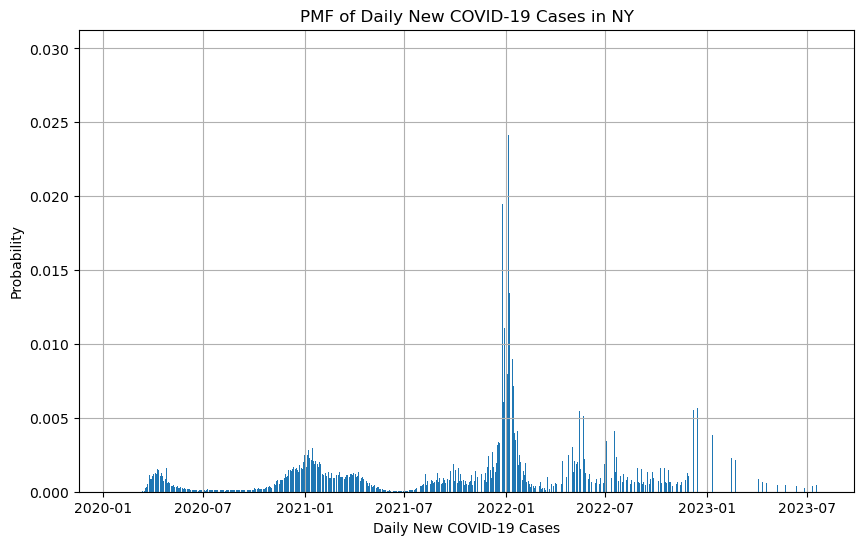


Distribution Statistics for NY:
Mean: 5301.494071146245
Median: 2061.0
Standard Deviation: 11695.508553886251


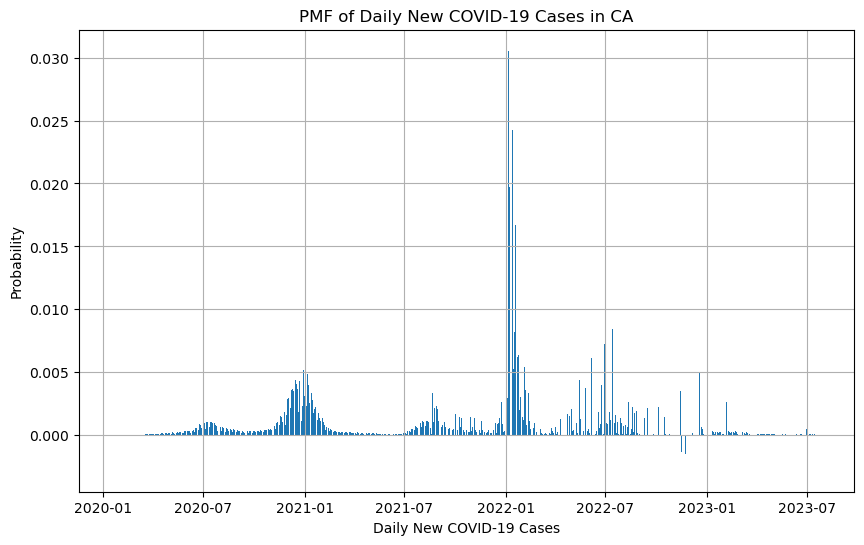


Distribution Statistics for CA:
Mean: 8932.61976284585
Median: 2624.0
Standard Deviation: 21243.58468411341


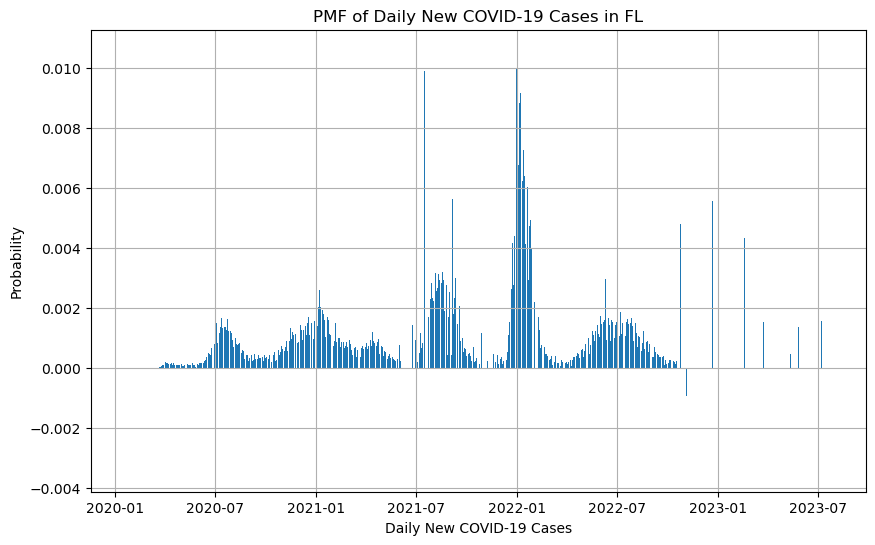


Distribution Statistics for FL:
Mean: 6030.038735177865
Median: 2805.0
Standard Deviation: 10397.069724765359


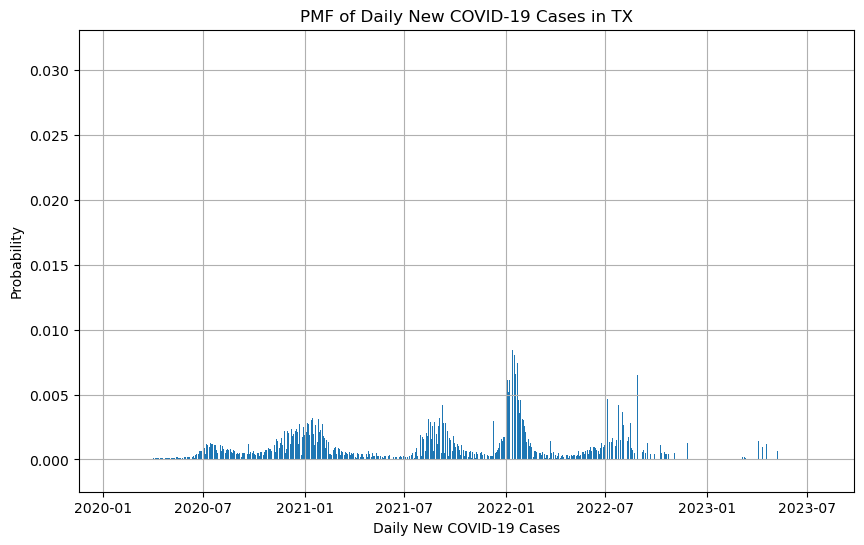


Distribution Statistics for TX:
Mean: 6725.852964426877
Median: 3139.0
Standard Deviation: 14765.875391846579


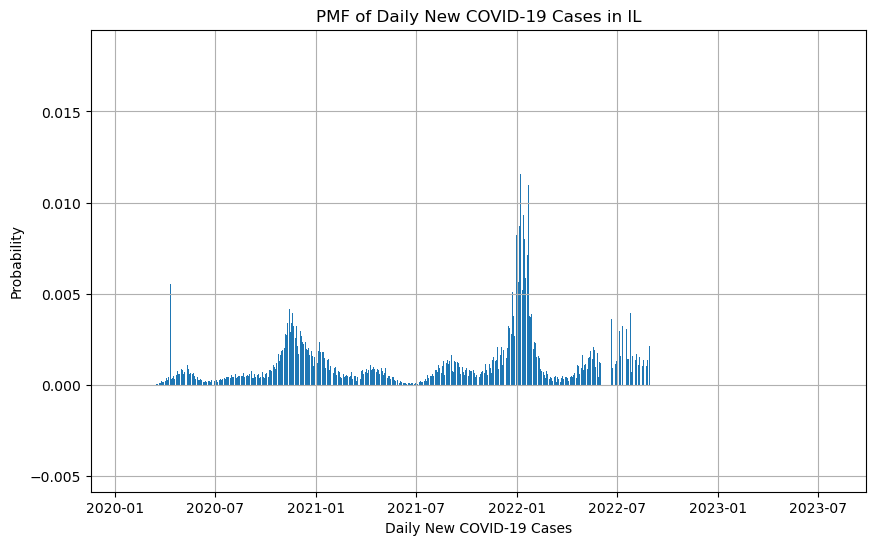


Distribution Statistics for IL:
Mean: 2929.8521739130433
Median: 1531.0
Standard Deviation: 5282.621744581618


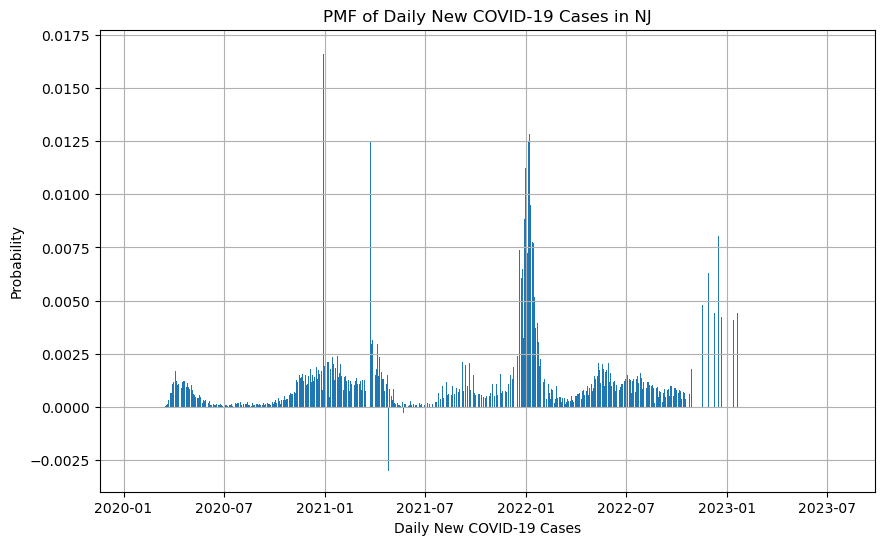


Distribution Statistics for NJ:
Mean: 2368.305138339921
Median: 1030.0
Standard Deviation: 4707.265786725894


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have correctly loaded your COVID-19 data
covid_cases_data = pd.read_csv("covid_confirmed_usafacts.csv")

# Define the list of states to compare
states_to_compare = ['NY', 'CA', 'FL', 'TX', 'IL', 'NJ']

for state in states_to_compare:
    plt.figure(figsize=(10, 6))

    # Filter the data for the state
    state_data = covid_cases_data[covid_cases_data['State'] == state]

    # Drop non-numeric columns
    state_data_numeric = state_data.drop(columns=['countyFIPS', 'County Name', 'State', 'StateFIPS'])

    # Aggregate data for the state by summing across all counties
    state_total_cases = state_data_numeric.sum()

    # Convert date columns to datetime objects
    state_total_cases.index = pd.to_datetime(state_total_cases.index)

    # Calculate the differences to get daily new cases
    daily_cases = state_total_cases.diff().fillna(0)

    # Calculate PMF
    total_cases = daily_cases.sum()
    pmf = daily_cases / total_cases

    # Plot the PMF
    plt.bar(pmf.index, pmf.values)
    plt.xlabel('Daily New COVID-19 Cases')
    plt.ylabel('Probability')
    plt.title(f'PMF of Daily New COVID-19 Cases in {state}')
    plt.grid(True)
    plt.show()

    # Describe the distribution statistics
    print(f"\nDistribution Statistics for {state}:")
    print("Mean:", daily_cases.mean())
    print("Median:", daily_cases.median())
    print("Standard Deviation:", daily_cases.std())


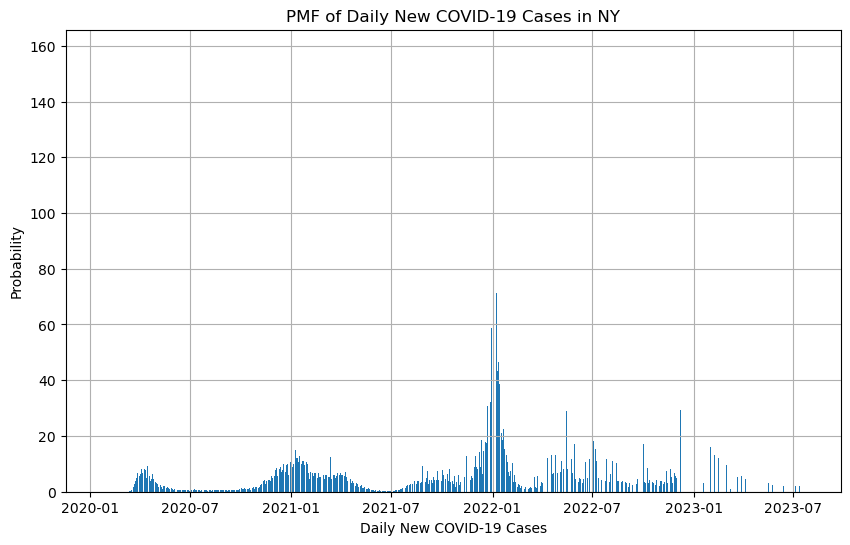


Distribution Statistics for NY:
Mean: 5301.494071146245
Median: 2061.0
Standard Deviation: 11695.508553886251


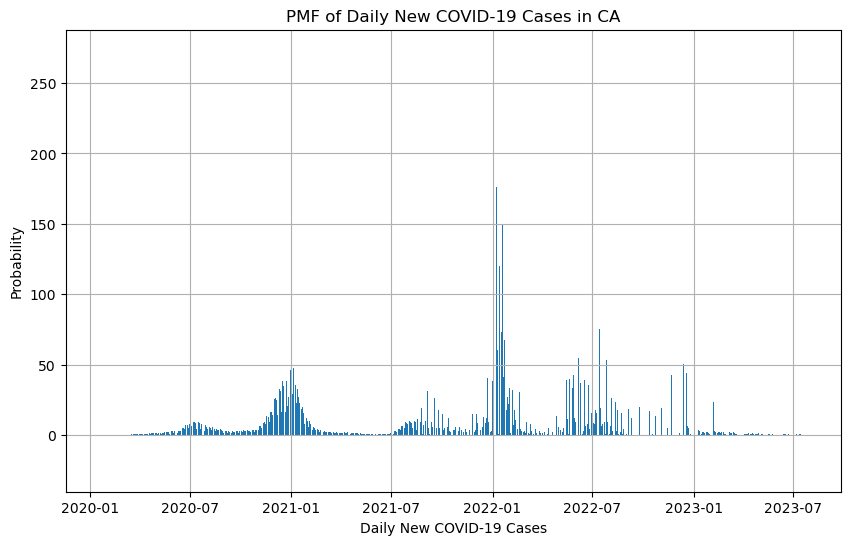


Distribution Statistics for CA:
Mean: 8932.61976284585
Median: 2624.0
Standard Deviation: 21243.58468411341


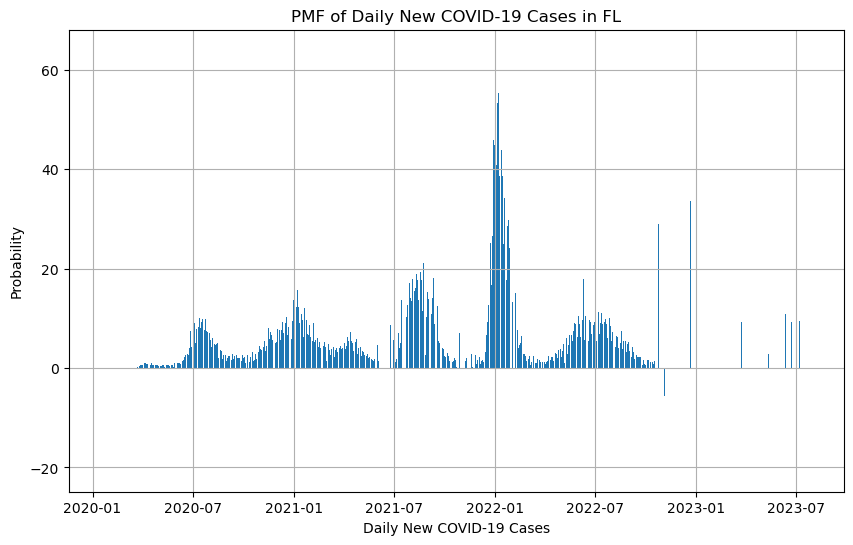


Distribution Statistics for FL:
Mean: 6030.038735177865
Median: 2805.0
Standard Deviation: 10397.069724765359


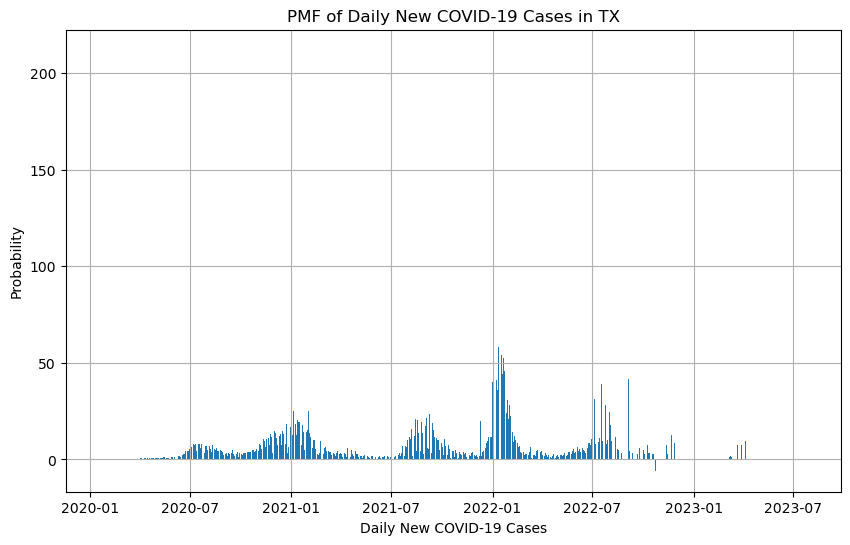


Distribution Statistics for TX:
Mean: 6725.852964426877
Median: 3139.0
Standard Deviation: 14765.875391846579


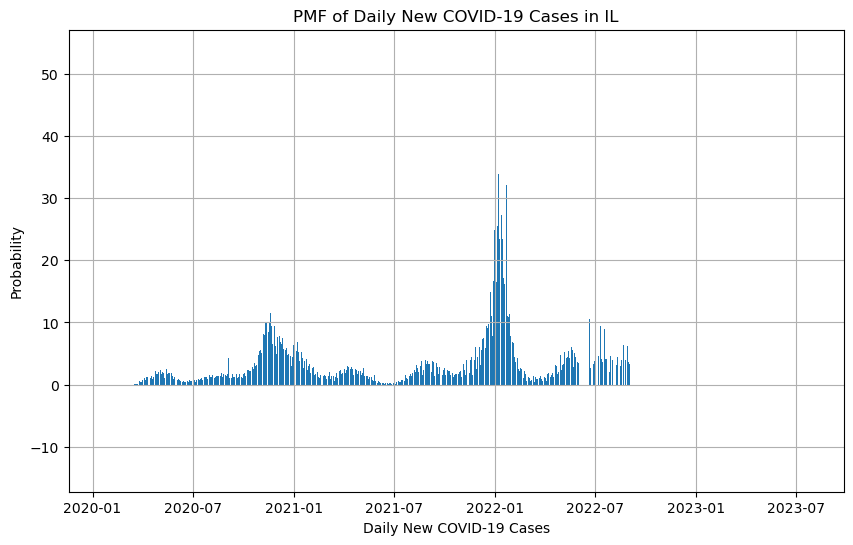


Distribution Statistics for IL:
Mean: 2929.8521739130433
Median: 1531.0
Standard Deviation: 5282.621744581618


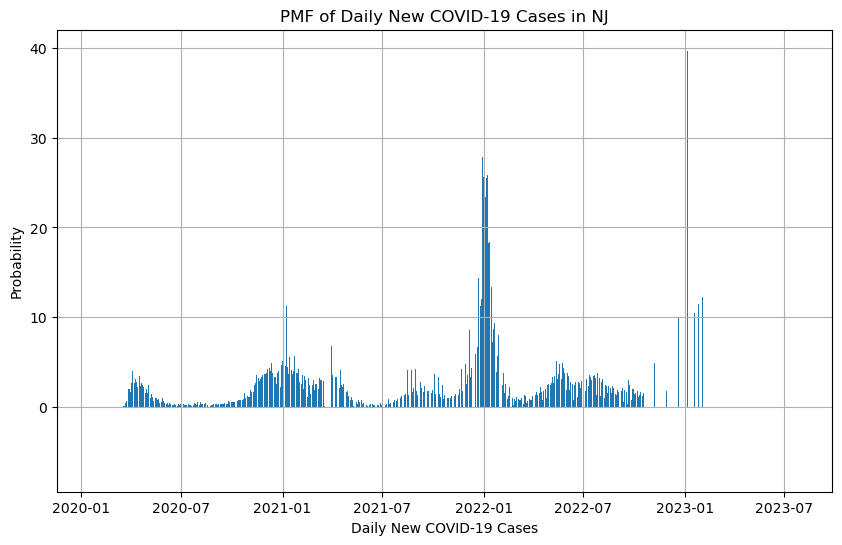


Distribution Statistics for NJ:
Mean: 2368.305138339921
Median: 1030.0
Standard Deviation: 4707.265786725894


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have correctly loaded your COVID-19 data
covid_cases_data = pd.read_csv("covid_confirmed_usafacts.csv")

# Define the list of states to compare
states_to_compare = ['NY', 'CA', 'FL', 'TX', 'IL', 'NJ']

for state in states_to_compare:
    plt.figure(figsize=(10, 6))

    # Filter the data for the state
    state_data = covid_cases_data[covid_cases_data['State'] == state]

    # Drop non-numeric columns
    state_data_numeric = state_data.drop(columns=['countyFIPS', 'County Name', 'State', 'StateFIPS'])

    # Aggregate data for the state by summing across all counties
    state_total_cases = state_data_numeric.sum()

    # Convert date columns to datetime objects
    state_total_cases.index = pd.to_datetime(state_total_cases.index)

    # Calculate the differences to get daily new cases
    daily_cases = state_total_cases.diff().fillna(0)

    # Calculate PMF
    pmf = daily_cases / len(daily_cases)

    # Plot the PMF
    plt.bar(pmf.index, pmf.values)
    plt.xlabel('Daily New COVID-19 Cases')
    plt.ylabel('Probability')
    plt.title(f'PMF of Daily New COVID-19 Cases in {state}')
    plt.grid(True)
    plt.show()

    # Describe the distribution statistics
    print(f"\nDistribution Statistics for {state}:")
    print("Mean:", daily_cases.mean())
    print("Median:", daily_cases.median())
    print("Standard Deviation:", daily_cases.std())


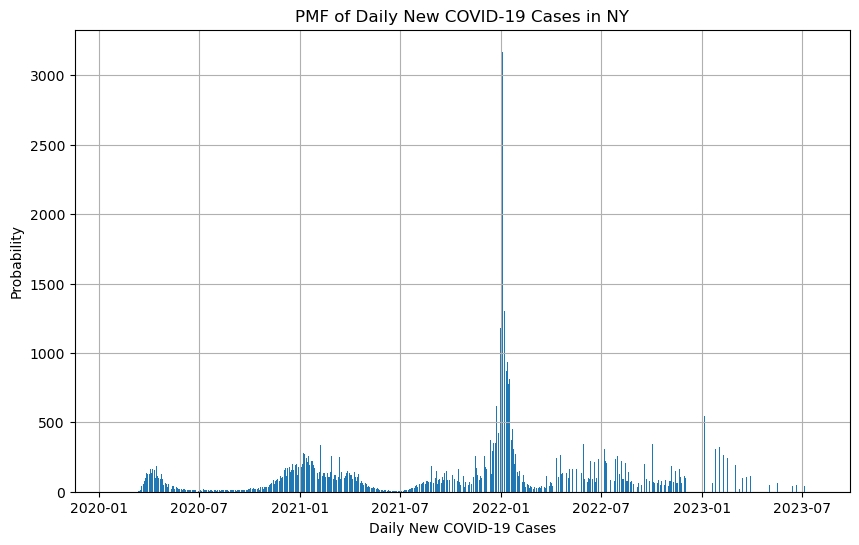


Distribution Statistics for NY:
Mean: 5301.494071146245
Median: 2061.0
Standard Deviation: 11695.508553886251


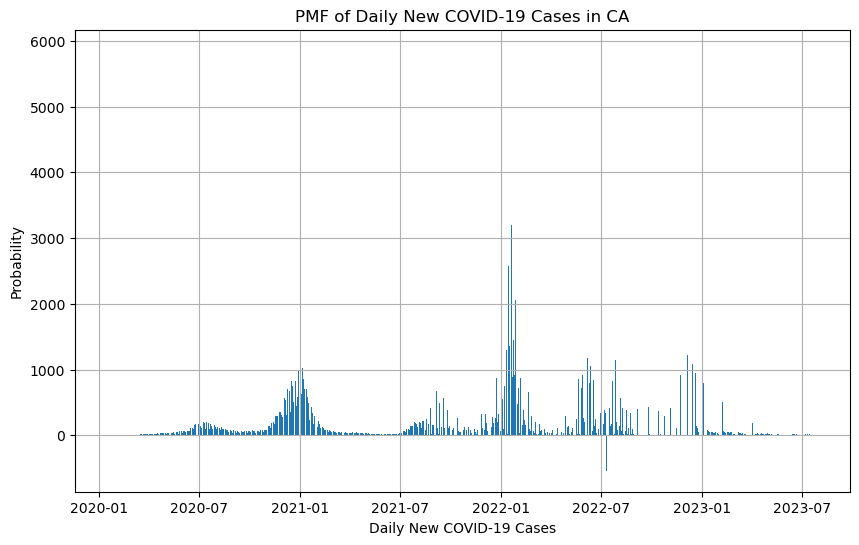


Distribution Statistics for CA:
Mean: 8932.61976284585
Median: 2624.0
Standard Deviation: 21243.58468411341


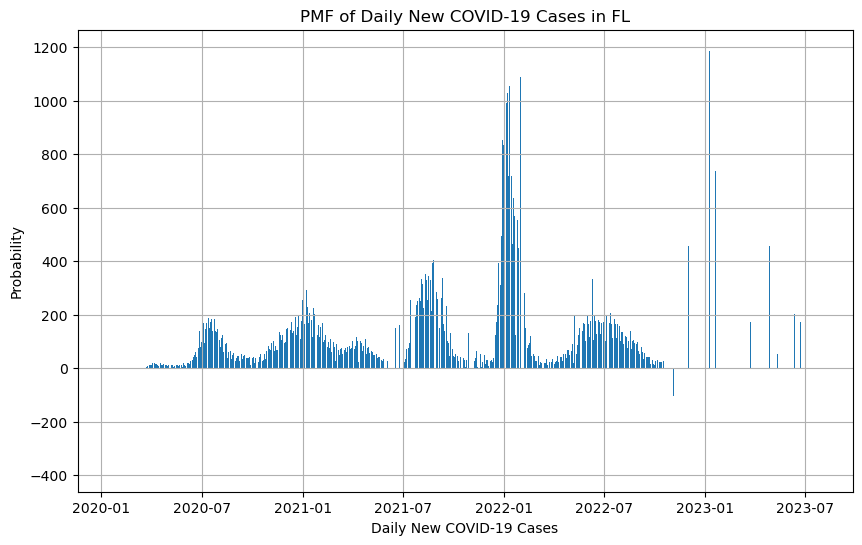


Distribution Statistics for FL:
Mean: 6030.038735177865
Median: 2805.0
Standard Deviation: 10397.069724765359


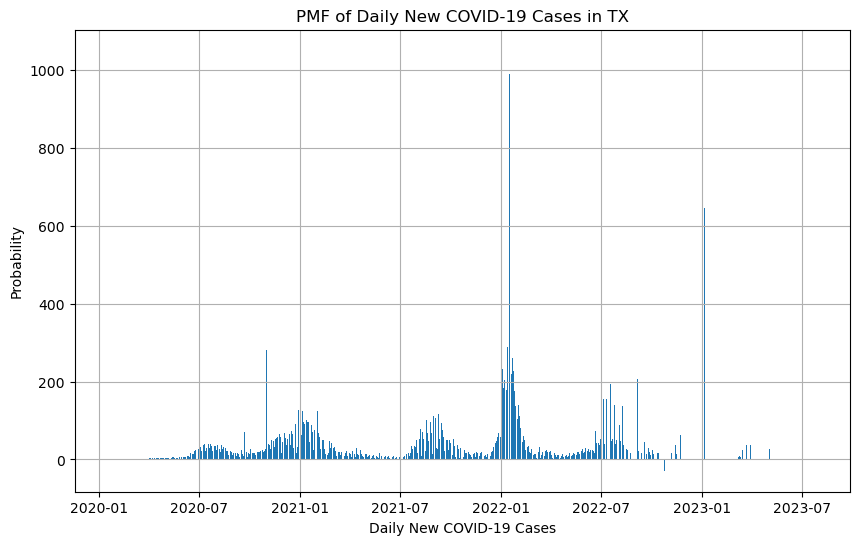


Distribution Statistics for TX:
Mean: 6725.852964426877
Median: 3139.0
Standard Deviation: 14765.875391846579


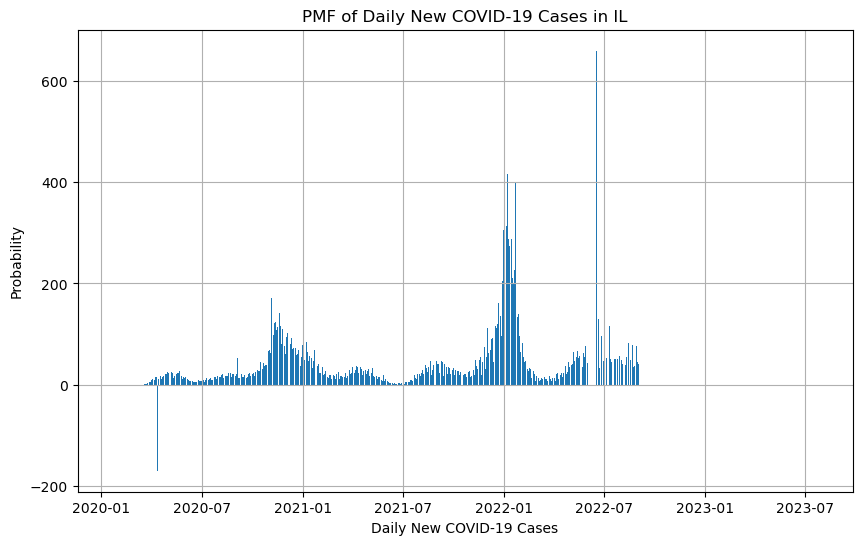


Distribution Statistics for IL:
Mean: 2929.8521739130433
Median: 1531.0
Standard Deviation: 5282.621744581618


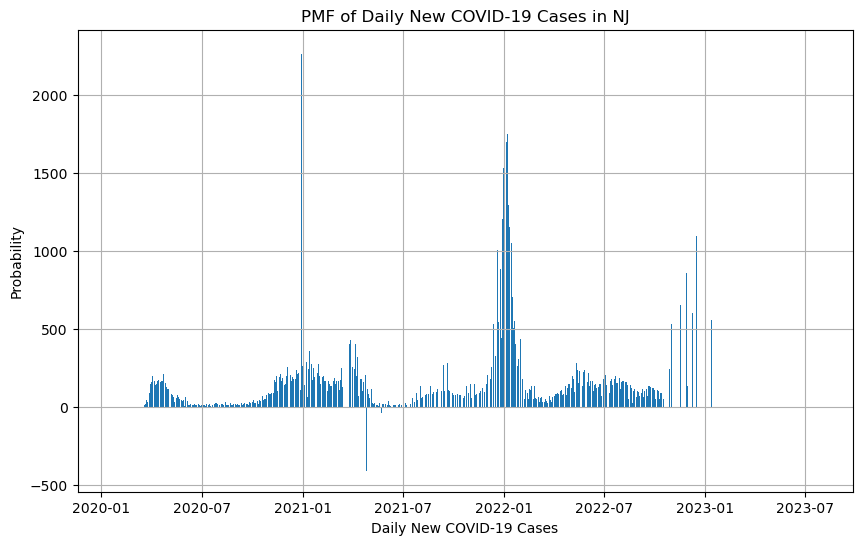


Distribution Statistics for NJ:
Mean: 2368.305138339921
Median: 1030.0
Standard Deviation: 4707.265786725894


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have correctly loaded your COVID-19 data
covid_cases_data = pd.read_csv("covid_confirmed_usafacts.csv")

# Define the list of states to compare
states_to_compare = ['NY', 'CA', 'FL', 'TX', 'IL', 'NJ']

for state in states_to_compare:
    plt.figure(figsize=(10, 6))

    # Filter the data for the state
    state_data = covid_cases_data[covid_cases_data['State'] == state]

    # Drop non-numeric columns and columns not related to dates
    state_data_numeric = state_data.drop(columns=['countyFIPS', 'County Name', 'State', 'StateFIPS'])

    # Sum across all counties to get total cases for the state on each date
    state_total_cases = state_data_numeric.sum()

    # Convert date columns to datetime objects
    state_total_cases.index = pd.to_datetime(state_total_cases.index)

    # Calculate the differences to get daily new cases
    daily_cases = state_total_cases.diff().fillna(0)

    # Calculate PMF
    pmf = daily_cases / len(state_data_numeric)  # Divide by the number of counties

    # Plot the PMF
    plt.bar(pmf.index, pmf.values)
    plt.xlabel('Daily New COVID-19 Cases')
    plt.ylabel('Probability')
    plt.title(f'PMF of Daily New COVID-19 Cases in {state}')
    plt.grid(True)
    plt.show()

    # Describe the distribution statistics
    print(f"\nDistribution Statistics for {state}:")
    print("Mean:", daily_cases.mean())
    print("Median:", daily_cases.median())
    print("Standard Deviation:", daily_cases.std())


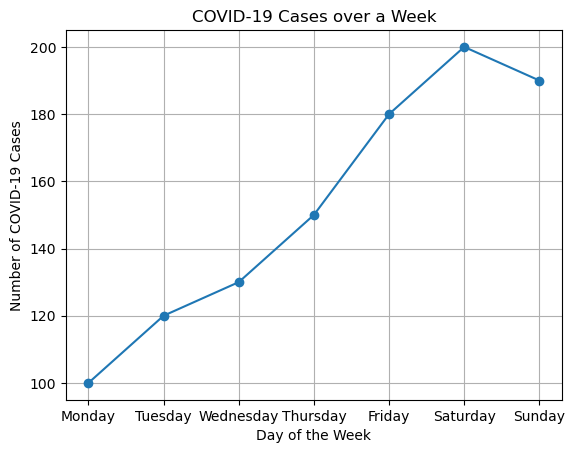

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Example daily COVID-19 cases for a week (Monday to Sunday)
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cases = [100, 120, 130, 150, 180, 200, 190]  # Hypothetical daily case counts

# Plotting the data
plt.plot(days, cases, marker='o', linestyle='-')
plt.xlabel('Day of the Week')
plt.ylabel('Number of COVID-19 Cases')
plt.title('COVID-19 Cases over a Week')
plt.grid(True)
plt.show()


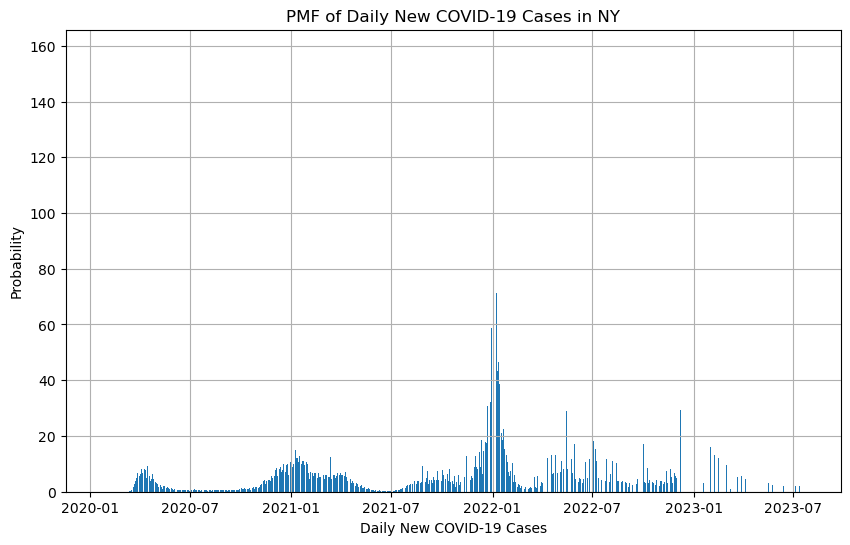


Distribution Statistics for NY:
Mean: 5301.494071146245
Median: 2061.0
Standard Deviation: 11695.508553886251
Variance: 136784920.3340265
Skewness: 8.390017067833627
Kurtosis: 103.93173334407977


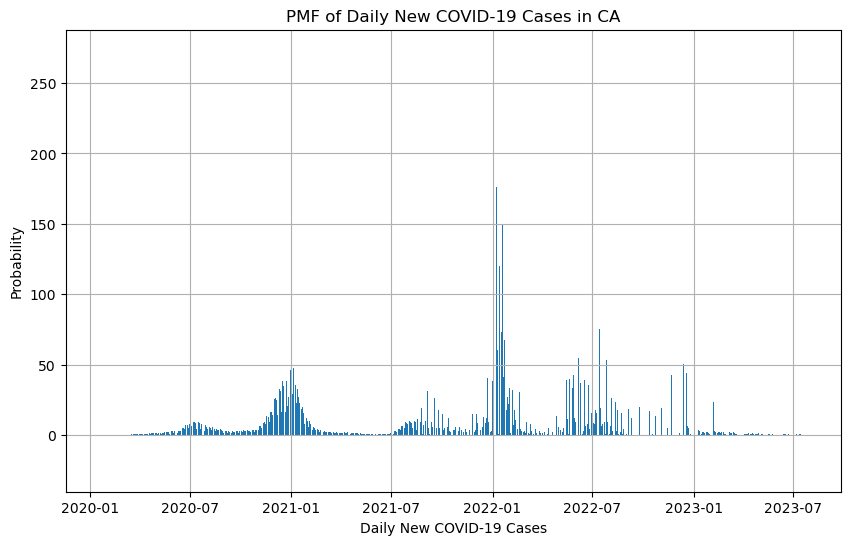


Distribution Statistics for CA:
Mean: 8932.61976284585
Median: 2624.0
Standard Deviation: 21243.58468411341
Variance: 451289890.23109794
Skewness: 7.705198302745079
Kurtosis: 88.86281015996357


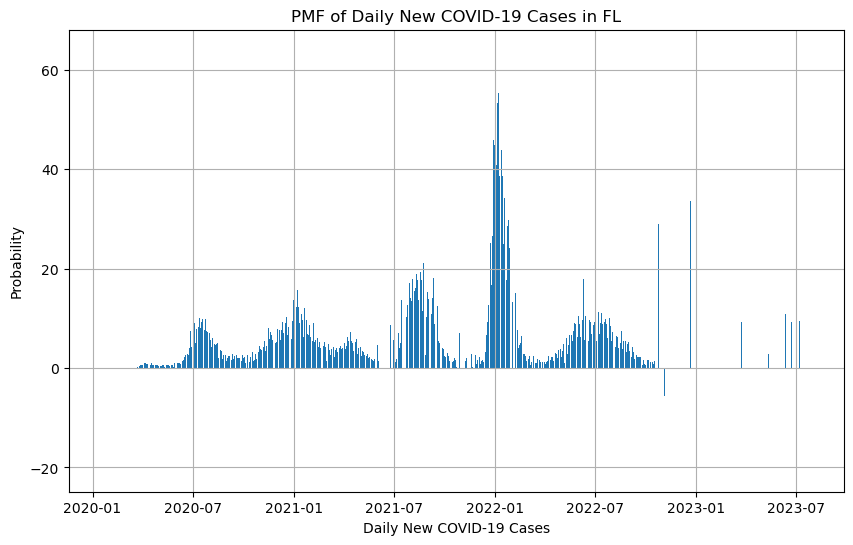


Distribution Statistics for FL:
Mean: 6030.038735177865
Median: 2805.0
Standard Deviation: 10397.069724765359
Variance: 108099058.8616324
Skewness: 3.7634853340177457
Kurtosis: 18.14571432007848


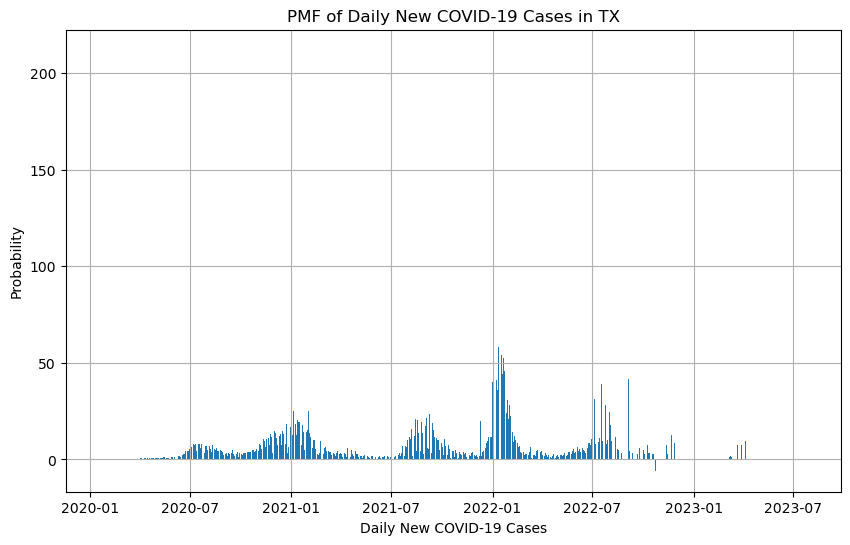


Distribution Statistics for TX:
Mean: 6725.852964426877
Median: 3139.0
Standard Deviation: 14765.875391846579
Variance: 218031076.08754036
Skewness: 9.91181650122623
Kurtosis: 148.93830710149467


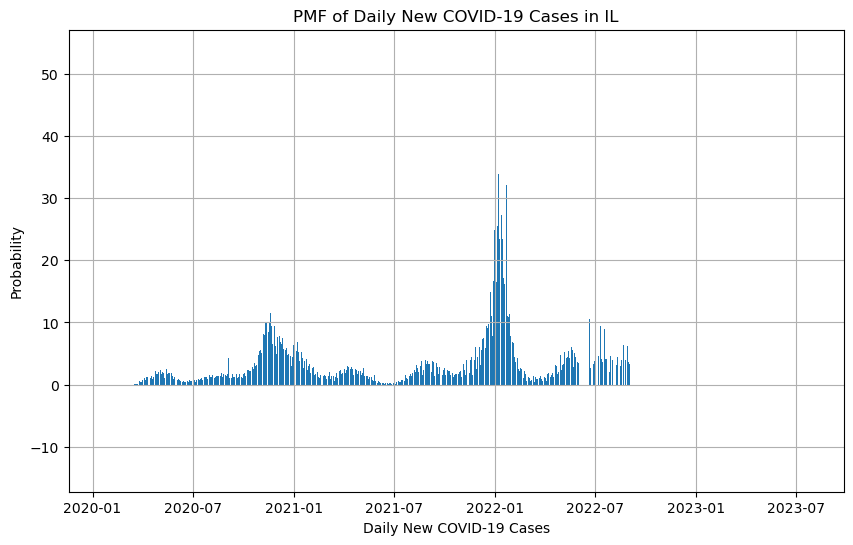


Distribution Statistics for IL:
Mean: 2929.8521739130433
Median: 1531.0
Standard Deviation: 5282.621744581618
Variance: 27906092.496326536
Skewness: 4.73019459187512
Kurtosis: 34.583202880084464


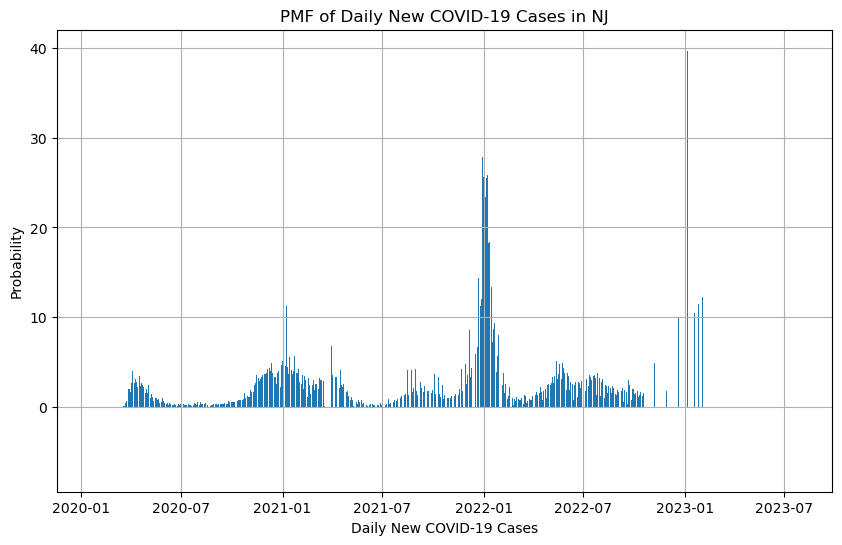


Distribution Statistics for NJ:
Mean: 2368.305138339921
Median: 1030.0
Standard Deviation: 4707.265786725894
Variance: 22158351.18688015
Skewness: 5.1633822235630875
Kurtosis: 35.032152948270806


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have correctly loaded your COVID-19 data
covid_cases_data = pd.read_csv("covid_confirmed_usafacts.csv")

# Define the list of states to compare
states_to_compare = ['NY', 'CA', 'FL', 'TX', 'IL', 'NJ']

for state in states_to_compare:
    plt.figure(figsize=(10, 6))

    # Filter the data for the state
    state_data = covid_cases_data[covid_cases_data['State'] == state]

    # Drop non-numeric columns
    state_data_numeric = state_data.drop(columns=['countyFIPS', 'County Name', 'State', 'StateFIPS'])

    # Aggregate data for the state by summing across all counties
    state_total_cases = state_data_numeric.sum()

    # Convert date columns to datetime objects
    state_total_cases.index = pd.to_datetime(state_total_cases.index)

    # Calculate the differences to get daily new cases
    daily_cases = state_total_cases.diff().fillna(0)

    # Calculate PMF
    pmf = daily_cases / len(daily_cases)

    # Plot the PMF
    plt.bar(pmf.index, pmf.values)
    plt.xlabel('Daily New COVID-19 Cases')
    plt.ylabel('Probability')
    plt.title(f'PMF of Daily New COVID-19 Cases in {state}')
    plt.grid(True)
    plt.show()

    # Describe the distribution statistics
    print(f"\nDistribution Statistics for {state}:")
    print("Mean:", daily_cases.mean())
    print("Median:", daily_cases.median())
    print("Standard Deviation:", daily_cases.std())
    print("Variance:", daily_cases.var())
    print("Skewness:", daily_cases.skew())
    print("Kurtosis:", daily_cases.kurtosis())
